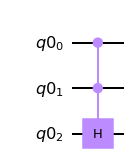

In [1]:
# How can I create a custom controlled gate? 

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate

qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
ch_gate = HGate().control(2)
qc.append(ch_gate,qr)
qc.draw('mpl')

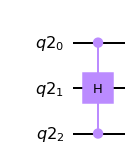

In [3]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate

qr = QuantumRegister(3)
qc = QuantumCircuit(qr)
ch_gate = HGate().control(2)
qc.append(ch_gate,[0,2,1])
qc.draw('mpl')

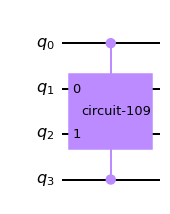

In [4]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate

qc1 = QuantumCircuit(2)
qc1.x(0)
qc1.h(1)
custom = qc1.to_gate().control(2)

qc2 = QuantumCircuit(4)
qc2.append(custom,[0,3,1,2])
qc2.draw('mpl')

In [5]:
# How can I make a noise model?

from qiskit import IBMQ, QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [7]:
backend = provider.get_backend('ibm_oslo')
noise_model = NoiseModel.from_backend(backend)

In [8]:
sim = AerSimulator(noise_model=noise_model)

In [9]:
qc = QuantumCircuit(3)
qc.measure_all()
sim.run(qc).result().get_counts()

{'001': 3, '100': 17, '010': 15, '000': 989}

In [10]:
from qiskit import QuantumCircuit,IBMQ
from qiskit.providers.aer import AerSimulator
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import ReadoutError

In [11]:
noise_model = NoiseModel()
noise_model.add_readout_error(
   error = ReadoutError(
       [[0.9,0.1],
       [0, 1]]),
    qubits = [0]
)

In [16]:
sim = AerSimulator(noise_model = noise_model)

qc = QuantumCircuit(3)
#qc.x(0)
qc.measure_all()
sim.run(qc).result().get_counts()

{'001': 105, '000': 919}

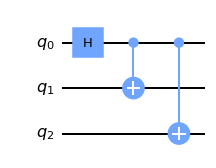

In [22]:
# How can I transpile a quantum circuit

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.draw('mpl')

In [29]:
from qiskit import IBMQ, transpile
provider = IBMQ.get_provider(hub='ibm-q',group='open',project='main')
backend = provider.get_backend('ibmq_lima')

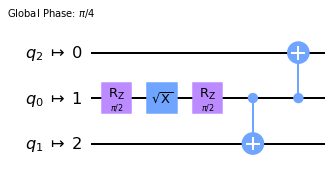

In [30]:
transpile(qc,backend).draw(output='mpl', idle_wires=False)

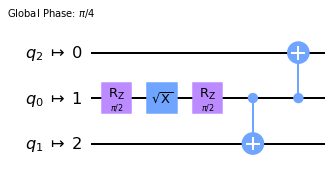

In [33]:
transpile(qc,backend,optimization_level=3).draw(output='mpl', idle_wires=False)

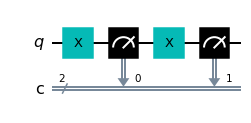

In [37]:
# How Can I Measure Qubits Midway Through a Quantum Circuit? 

from qiskit import QuantumCircuit

circuit = QuantumCircuit(1,2)
circuit.x(0)
circuit.measure(0,0)
circuit.x(0)
circuit.measure(0,1)

circuit.draw(output='mpl')

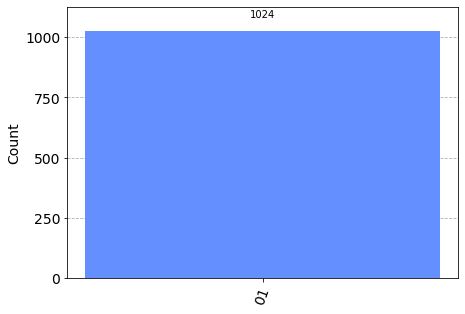

In [38]:
from qiskit.providers.aer  import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(circuit)
result = job.result()
counts = result.get_counts()


from qiskit.visualization import plot_histogram
plot_histogram(counts)

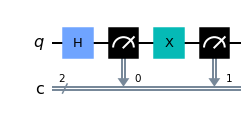

In [39]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1,2)
circuit.h(0)
circuit.measure(0,0)
circuit.x(0)
circuit.measure(0,1)

circuit.draw(output='mpl')

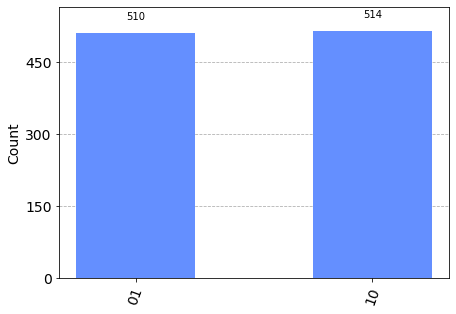

In [40]:
from qiskit.providers.aer  import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(circuit)
result = job.result()
counts = result.get_counts()


from qiskit.visualization import plot_histogram
plot_histogram(counts)

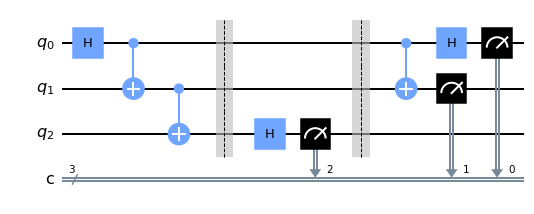

In [38]:
# GHZ(Greenberger-Hornee-Zeilinger) state
ghz = QuantumCircuit(3,3)
ghz.h(0)
ghz.cx(0,1)
ghz.cx(1,2)

ghz.barrier()

ghz.h(2)
ghz.measure(2,2)

ghz.barrier()

ghz.cx(0,1)
ghz.h(0)

ghz.measure(0,0)
ghz.measure(1,1)
# this is called circuit crystalization
ghz.draw(output='mpl')

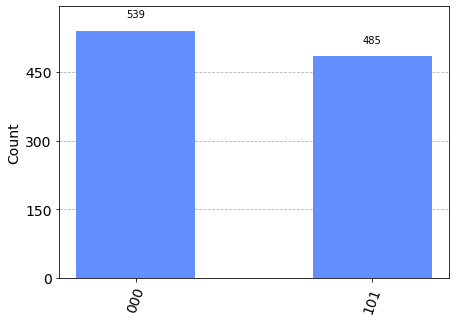

In [42]:
from qiskit.providers.aer  import QasmSimulator
simulator = QasmSimulator()

job = simulator.run(ghz)
result = job.result()
counts = result.get_counts()


from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [44]:
# How can I find the expectation value of an operator

$ E = \langle \psi | O | \psi \rangle $

In [2]:
from qiskit import QuantumCircuit
from qiskit.opflow import CircuitOp

circuit = QuantumCircuit(2)
circuit.z(0)
circuit.z(1)
op = CircuitOp(circuit)

In [3]:
# Alternatively

from qiskit.opflow import X,Y,Z,I

op = (-1.0523732 * I^I) + (0.39793742 * I^Z) + (-0.3979374 * Z^I) + (-0.0112801 * Z^Z) + (0.18093119 * X^X)

print(op)

-1.0523732 * II
+ 0.39793742 * IZ
- 0.3979374 * ZI
- 0.0112801 * ZZ
+ 0.18093119 * XX


In [4]:
from qiskit.opflow import CircuitStateFn

psi = QuantumCircuit(2)
psi.x(0)
psi.x(1)

psi = CircuitStateFn(psi)

print(psi)

CircuitStateFn(
     ┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ X ├
     └───┘
)


In [5]:
print('Exact:',psi.adjoint().compose(op).compose(psi).eval().real)

Exact: -1.0636533199999998


In [9]:
from qiskit.opflow.state_fns import StateFn

measurable_expression = StateFn(op,is_measurement=True).compose(psi)
print(measurable_expression)

ComposedOp([
  OperatorMeasurement(-1.0523732 * II
  + 0.39793742 * IZ
  - 0.3979374 * ZI
  - 0.0112801 * ZZ
  + 0.18093119 * XX),
  CircuitStateFn(
       ┌───┐
  q_0: ┤ X ├
       ├───┤
  q_1: ┤ X ├
       └───┘
  )
])


In [10]:
from qiskit.opflow.expectations import PauliExpectation
expectation = PauliExpectation().convert(measurable_expression)
print(expectation)

SummedOp([
  ComposedOp([
    OperatorMeasurement(0.18093119 * ZZ
    - 1.0523732 * II),
    CircuitStateFn(
         ┌───┐┌───┐
    q_0: ┤ X ├┤ H ├
         ├───┤├───┤
    q_1: ┤ X ├┤ H ├
         └───┘└───┘
    )
  ]),
  ComposedOp([
    OperatorMeasurement(0.39793742 * IZ
    - 0.3979374 * ZI
    - 0.0112801 * ZZ),
    CircuitStateFn(
         ┌───┐
    q_0: ┤ X ├
         ├───┤
    q_1: ┤ X ├
         └───┘
    )
  ])
])


In [11]:
from qiskit.opflow.converters import CircuitSampler
from qiskit.providers.aer import QasmSimulator
simulator = QasmSimulator()

sampler = CircuitSampler(simulator).convert(expectation)

print('Sampled: ', sampler.eval().real)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Sampled:  -1.070367563378906


In [12]:
from qiskit.opflow.expectations import MatrixExpectation
expectation_exact = MatrixExpectation().convert(measurable_expression)
sampler_exact =  CircuitSampler(simulator).convert(expectation_exact)
print('Exact', sampler_exact.eval().real)

Exact -1.0636533199999998


In [15]:
# How can I create a custom gate from a matrix?
import qiskit.quantum_info as qi

#qubit-0 as control and qubit-1 as target
cx_op  = qi.Operator([[1,0,0,0],
                     [0,0,0,1],
                     [0,0,1,0],
                     [0,1,0,0]])

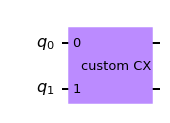

In [18]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(2)
qc.unitary(cx_op, [0,1], label='custom CX')
qc.draw('mpl')

In [19]:
#swap matrix operator
iswap_op = qi.Operator([[1,0,0,0],
                       [0,0,1j,0],
                       [0,1j,0,0],
                       [0,0,0,1]])

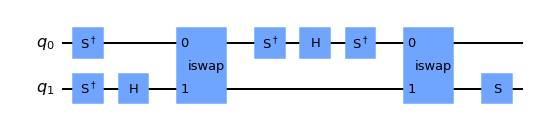

In [20]:
#CNOT in terms of ISWAP and single-qubit gates

cx_circ = QuantumCircuit(2)

# Add gates 
cx_circ.sdg(1)
cx_circ.h(1)
cx_circ.sdg(0)
cx_circ.unitary(iswap_op, [0,1], label='iswap')
cx_circ.sdg(0)
cx_circ.h(0)
cx_circ.sdg(0)
cx_circ.unitary(iswap_op,[0,1],label='iswap')
cx_circ.s(1)

cx_circ.draw('mpl')

In [21]:
qi.Operator(cx_circ)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

In [32]:
# What are registers?

from qiskit import QuantumRegister, ClassicalRegister
qr = QuantumRegister(2, name='a')
qr2 = QuantumRegister(2, 'b')
cr = ClassicalRegister(2, 'output')

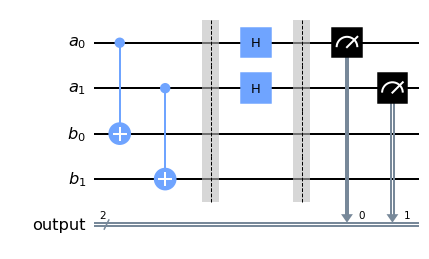

In [37]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(qr, qr2, cr)
qc.cx(qr,qr2)
qc.barrier()
qc.h(qr)
qc.barrier()
qc.measure(qr,cr)
qc.draw()

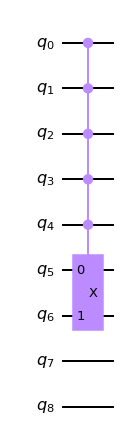

In [41]:
# What are Ancillary Qubits and how are they useful?

from qiskit import QuantumCircuit
qc = QuantumCircuit(9)
qc.mct([0,1,2,3,4],5, 6, mode='recursion')
qc.draw()

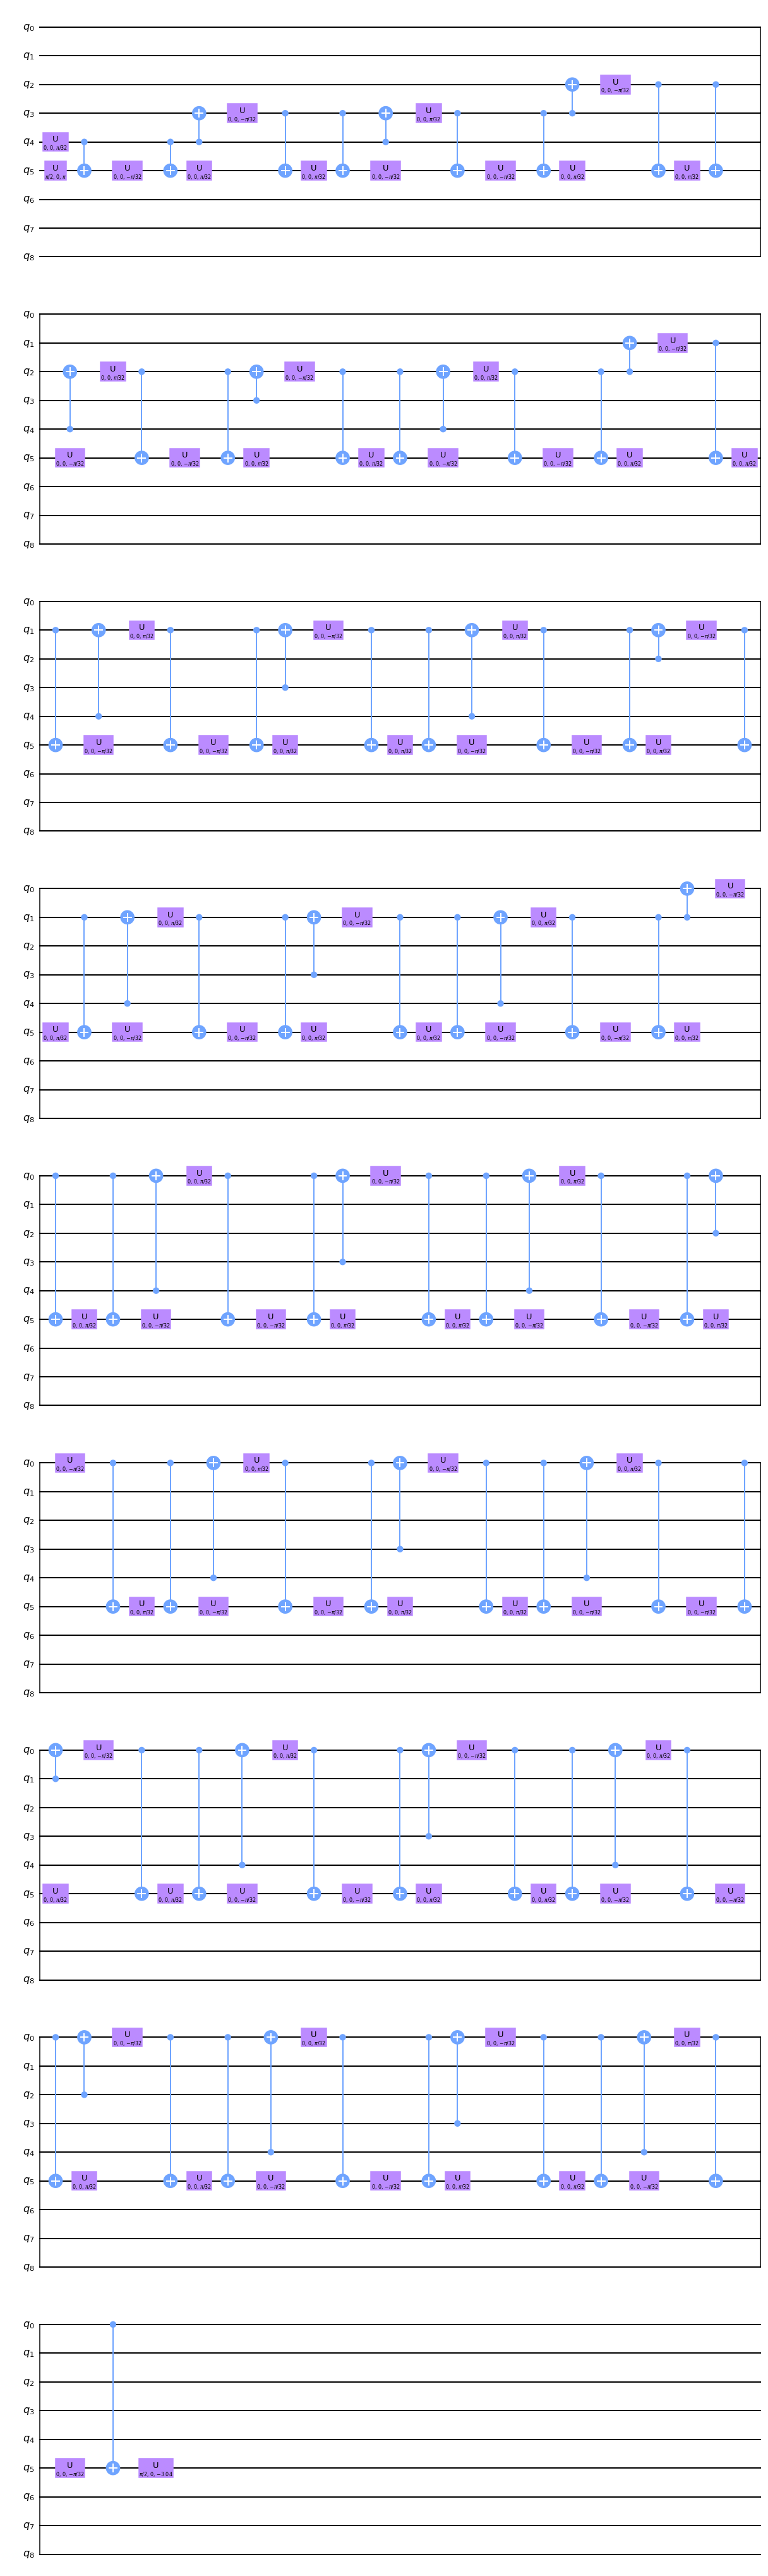

In [40]:
from qiskit import transpile
transpile(qc, basis_gates=['cx','u']).draw()

In [42]:
from qiskit import transpile
transpile(qc, basis_gates=['cx','u']).count_ops()['cx']

56

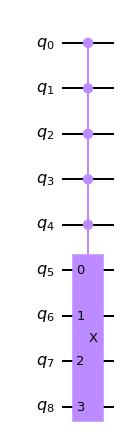

In [45]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(9)
qc.mct([0,1,2,3,4],5, [6,7,8], mode='v-chain')
qc.draw()

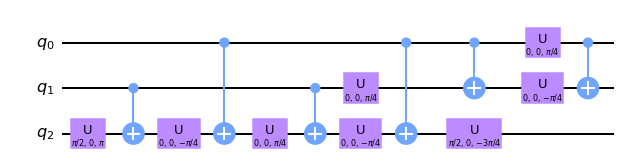

In [46]:
# How can I choose an initial layout for the transpiler?
from qiskit import QuantumCircuit, transpile
qc = QuantumCircuit(3)
qc.ccx(0,1,2)
tqc = transpile(qc, basis_gates=['u','cx'])
tqc.draw()

/tmp/ipykernel_815/6330343.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeJakarta


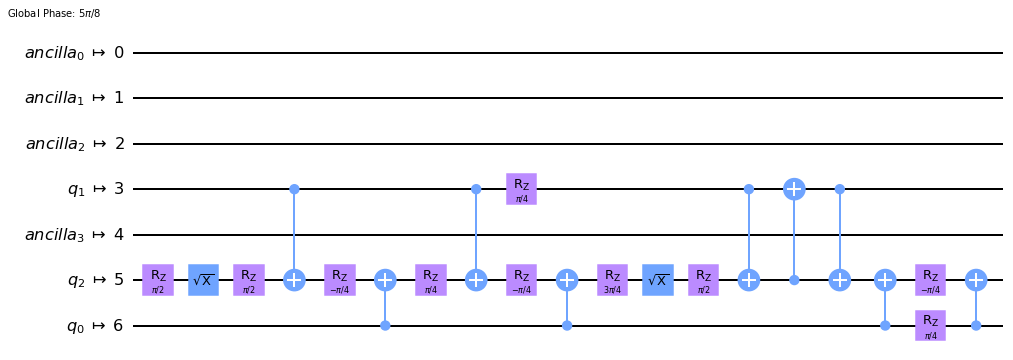

In [50]:
from qiskit.test.mock import FakeJakarta
jakarta = FakeJakarta()
transpile(qc,jakarta, optimization_level=3, initial_layout=[6,3,5]).draw()

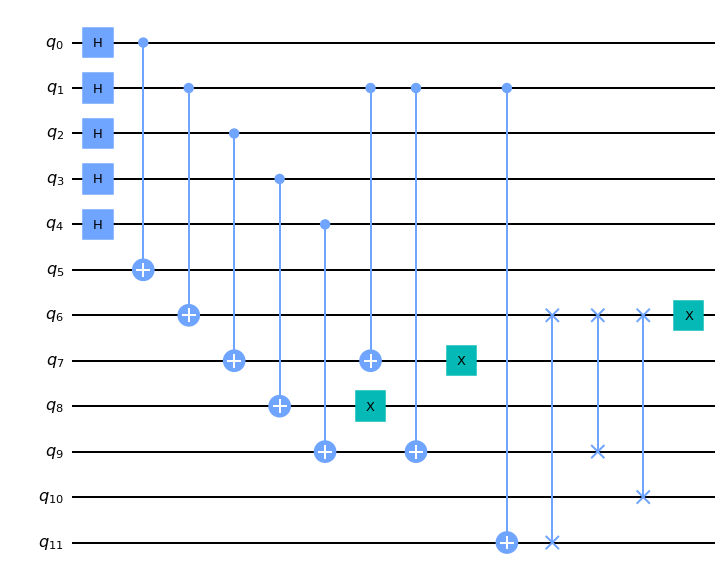

In [51]:
from qiskit import QuantumCircuit
qc = QuantumCircuit(12)
for idx in range(5):
    qc.h(idx)
    qc.cx(idx,idx+5)
    
qc.cx(1,7)
qc.x(8)
qc.cx(1,9)
qc.x(7)
qc.cx(1,11)
qc.swap(6,11)
qc.swap(6,9)
qc.swap(6,10)
qc.x(6)
qc.draw('mpl')

In [56]:
qc.depth()

9

In [57]:
qc2 = QuantumCircuit(2)
qc2.swap(0,1)
qc2.depth()

1

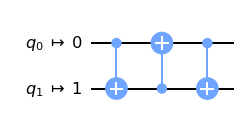

In [61]:
from qiskit import IBMQ, transpile
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q',group='open',project='main')
backend = provider.get_backend('ibmq_lima')
transpile(qc2, backend).draw(output='mpl', idle_wires=False)

In [63]:
transpile(qc2, backend).depth()

3

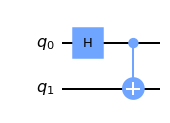

In [64]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0,1)
circuit.draw(output='mpl')

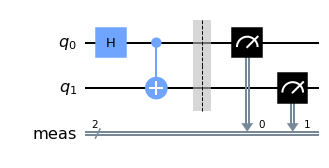

In [65]:
circuit.measure_all()
circuit.draw(output='mpl')

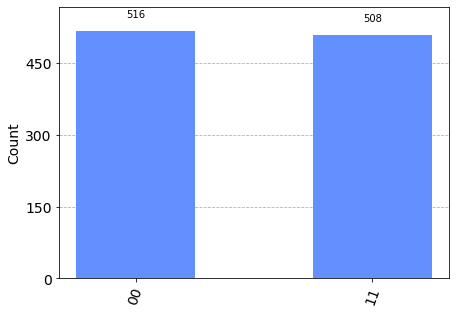

In [66]:
from qiskit.providers.aer  import QasmSimulator

simulator = QasmSimulator()

job = simulator.run(circuit)
result = job.result()
counts = result.get_counts()

from qiskit.visualization import plot_histogram
plot_histogram(counts)

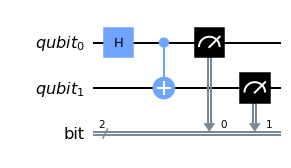

In [75]:
from qiskit import QuantumRegister, ClassicalRegister

qr = QuantumRegister(2, name='qubit')
cr = ClassicalRegister(2, name='bit')

circuit = QuantumCircuit(qr, cr)
circuit.h(qr[0])
circuit.cx(qr[0],qr[1])
circuit.measure(qr,cr)
circuit.draw('mpl')

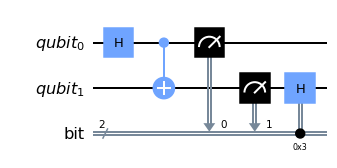

In [76]:
circuit.h(qr[1]).c_if(cr, 3)
circuit.draw('mpl')

In [79]:
sim = QasmSimulator()
print(sim.run(circuit).result().get_counts())

{'11': 517, '00': 507}


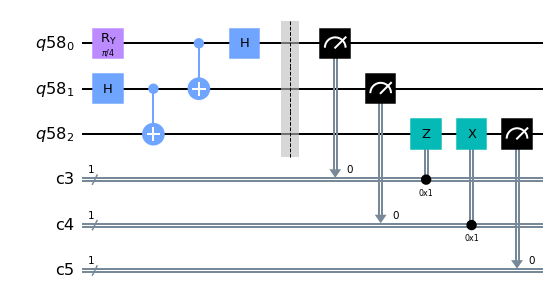

In [80]:
tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1],tq[2])

from numpy import pi
teleport.ry(pi/4, tq[0])

teleport.cx(tq[0],tq[1])
teleport.h(tq[0])
teleport.barrier()

teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

teleport.measure(tq[2],tc2[0])

teleport.draw('mpl')

In [108]:
# In What Different Ways Can I Draw a Quantum Circuit? 

tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1],tq[2])

from numpy import pi
teleport.ry(pi/4, tq[0])

teleport.cx(tq[0],tq[1])
teleport.h(tq[0])
teleport.barrier()

teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

teleport.measure(tq[2],tc2[0])

teleport.draw('text')

┌─────────┐          ┌───┐ ░ ┌─┐                
q65_0: ┤ Ry(π/4) ├───────■──┤ H ├─░─┤M├────────────────
       └──┬───┬──┘     ┌─┴─┐└───┘ ░ └╥┘┌─┐             
q65_1: ───┤ H ├─────■──┤ X ├──────░──╫─┤M├─────────────
          └───┘   ┌─┴─┐└───┘      ░  ║ └╥┘┌───┐┌───┐┌─┐
q65_2: ───────────┤ X ├───────────░──╫──╫─┤ Z ├┤ X ├┤M├
                  └───┘           ░  ║  ║ └─╥─┘└─╥─┘└╥┘
  c24: ══════════════════════════════╩══╬═══■════╬═══╬═
                                        ║  0x1   ║   ║ 
  c25: ═════════════════════════════════╩════════■═══╬═
                                                0x1  ║ 
  c26: ══════════════════════════════════════════════╩═

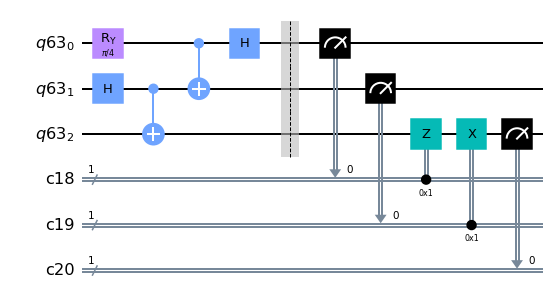

In [95]:
teleport.draw(output='mpl')

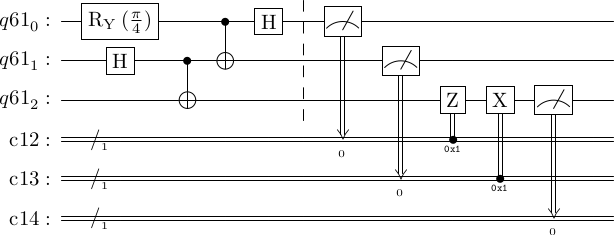

In [86]:
teleport.draw(output='latex')

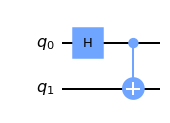

In [88]:
# How can I find reduced quantum states using Qiskit? 

from qiskit import QuantumCircuit

bell = QuantumCircuit(2)
bell.h(0)
bell.cx(0,1)

bell.draw(output='mpl')

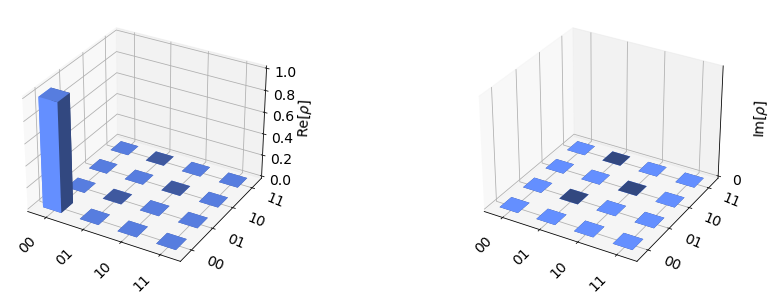

In [89]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_state_city

sv = Statevector.from_label('00')
sv.evolve(bell)
plot_state_city(sv)

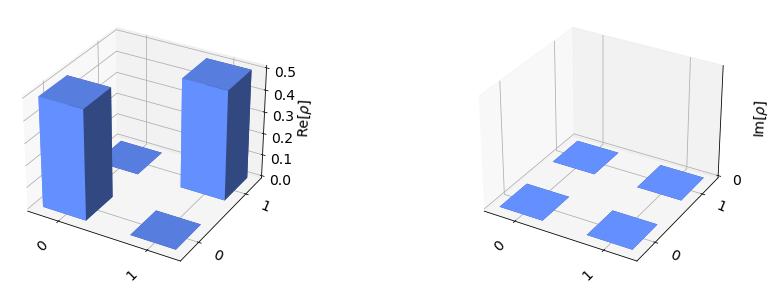

In [90]:
from qiskit.quantum_info import partial_trace, DensityMatrix

d = DensityMatrix(bell)
p = partial_trace(d, [1]) # Trace out 2nd qubit
plot_state_city(p)

In [97]:
# What tricks can I do with the draw method? 

tq = QuantumRegister(3)
tc0 = ClassicalRegister(1)
tc1 = ClassicalRegister(1)
tc2 = ClassicalRegister(1)

teleport = QuantumCircuit(tq, tc0,tc1,tc2)
teleport.h(tq[1])
teleport.cx(tq[1],tq[2])

from numpy import pi
teleport.ry(pi/4, tq[0])

teleport.cx(tq[0],tq[1])
teleport.h(tq[0])
teleport.barrier()

teleport.measure(tq[0], tc0[0])
teleport.measure(tq[1], tc1[0])

teleport.z(tq[2]).c_if(tc0, 1)
teleport.x(tq[2]).c_if(tc1, 1)

teleport.measure(tq[2],tc2[0])



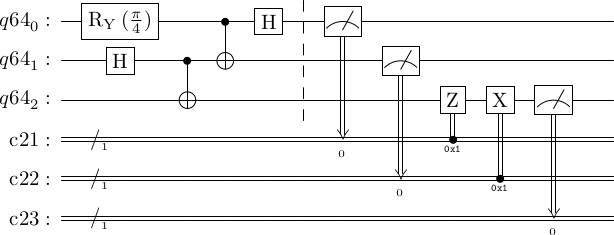

In [103]:
teleport.draw('latex') # filename='qteleporatation.pdf'

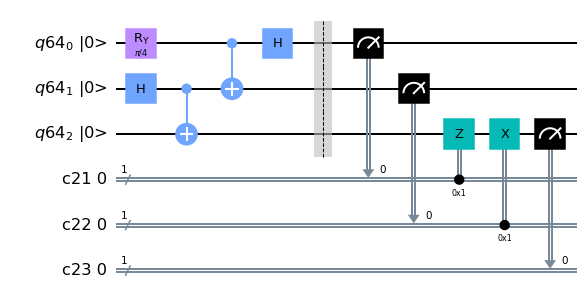

In [106]:
teleport.draw('mpl' , initial_state=True)

In [107]:
teleport.draw('text', fold=20)

┌─────────┐»
q64_0: ┤ Ry(π/4) ├»
       └──┬───┬──┘»
q64_1: ───┤ H ├───»
          └───┘   »
q64_2: ───────────»
                  »
  c21: ═══════════»
                  »
  c22: ═══════════»
                  »
  c23: ═══════════»
                  »
«                 »
«q64_0: ───────■──»
«            ┌─┴─┐»
«q64_1: ──■──┤ X ├»
«       ┌─┴─┐└───┘»
«q64_2: ┤ X ├─────»
«       └───┘     »
«  c21: ══════════»
«                 »
«  c22: ══════════»
«                 »
«  c23: ══════════»
«                 »
«       ┌───┐ ░ ┌─┐»
«q64_0: ┤ H ├─░─┤M├»
«       └───┘ ░ └╥┘»
«q64_1: ──────░──╫─»
«             ░  ║ »
«q64_2: ──────░──╫─»
«             ░  ║ »
«  c21: ═════════╩═»
«                  »
«  c22: ═══════════»
«                  »
«  c23: ═══════════»
«                  »
«               »
«q64_0: ────────»
«       ┌─┐     »
«q64_1: ┤M├─────»
«       └╥┘┌───┐»
«q64_2: ─╫─┤ Z ├»
«        ║ └─╥─┘»
«  c21: ═╬═══■══»
«        ║  0x1 »
«  c22: ═╩══════»
«               »
«  c23: ════════»
«               »
«               
«q64_0: ────────
«               
«q64_1: ────────
«       ┌───┐┌─┐
«q64_2: ┤ X ├┤M├
«       └─╥─┘└╥┘
«  c21: ══╬═══╬═
«         ║   ║ 
«  c22: ══■═══╬═
«        0x1  ║ 
«  c23: ══════╩═
«

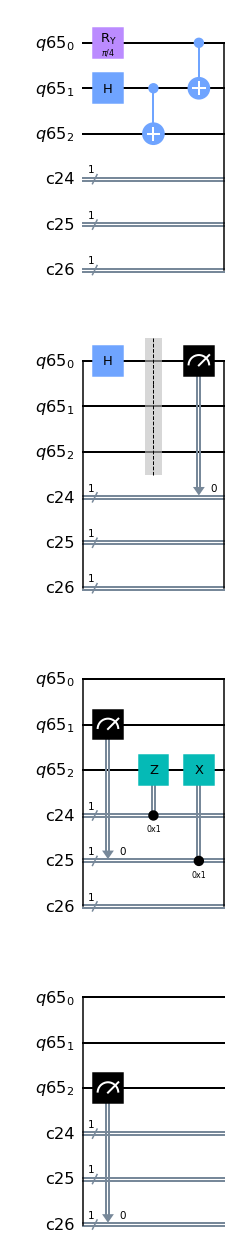

In [109]:
teleport.draw('mpl', fold=3)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


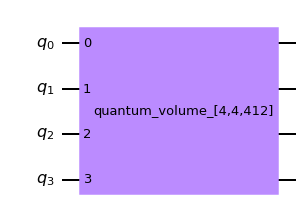

In [1]:
# How can I Construct a Quantum Volume Circuit?

# We use Quantum Volume to check to create random circuits and check how well the quantum computer carries those circuit
from qiskit.circuit.library import QuantumVolume
qv  = QuantumVolume(4)
qv.draw()

In [125]:
# How can I save Circuit Drawings to Different File Types?

from qiskit.circuit.library import QuantumVolume
qc = QuantumVolume(3,6).decompose()
qc.draw().savefig('qv_circuit.png')

In [126]:
# ![circuit image](qv_circuit.png) 

In [127]:
qc.draw('latex').save('qv_circuit_latex.png')

In [128]:
# ![circuit image](qv_circuit_latex.png)

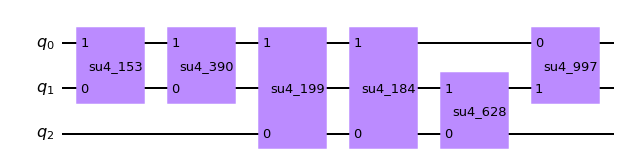

In [131]:
# Alternatively 
qc.draw('mpl',filename='ciruit.png')
qc.draw('mpl',filename='circuit.pdf')
qc.draw('mpl',filename='circuit.svg')

In [2]:
# How can I bundle several circuits into a single job ?

from qiskit import QuantumCircuit, Aer, transpile, assemble, execute
from qiskit.test.mock import FakeJakarta
jakarta = FakeJakarta()
qasm_sim = Aer.get_backend('qasm_simulator')

/tmp/ipykernel_1327/185727308.py:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeJakarta
<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [3]:
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.cx(0,1)
qc1.measure_all()

In [4]:
qc2 = QuantumCircuit(3)
qc2.h(0)
qc2.cx(0,1) 
qc2.cx(1,2)
qc2.measure_all()

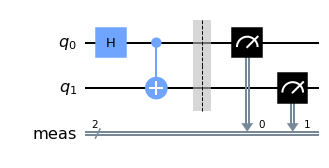

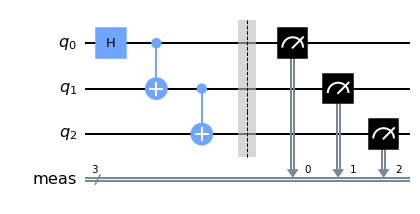

In [156]:
display(qc1.draw(),qc2.draw())

In [5]:
qc_list = [qc1,qc2]

In [6]:
job = execute(qc_list, qasm_sim)

In [7]:
job.result().get_counts()

[{'00': 507, '11': 517}, {'000': 506, '111': 518}]

In [8]:
tqc_list = transpile(qc_list,jakarta)
qobj = assemble(tqc_list, jakarta)

In [10]:
# job = jakarta.run(qobj)
# job.result().get_counts()

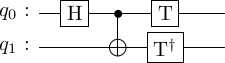

In [13]:
# How can I visualize quantum circuits using LaTeX?

from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0,1)
qc.t(0)
qc.tdg(1)
qc.draw('latex')

In [15]:
print(qc.draw('latex_source'))

\documentclass[border=2px]{standalone}

\usepackage[braket, qm]{qcircuit}
\usepackage{graphicx}

\begin{document}
\scalebox{1.0}{
\Qcircuit @C=1.0em @R=0.2em @!R { \\
	 	\nghost{{q}_{0} :  } & \lstick{{q}_{0} :  } & \gate{\mathrm{H}} & \ctrl{1} & \gate{\mathrm{T}} & \qw & \qw\\
	 	\nghost{{q}_{1} :  } & \lstick{{q}_{1} :  } & \qw & \targ & \gate{\mathrm{T^\dagger}} & \qw & \qw\\
\\ }}
\end{document}


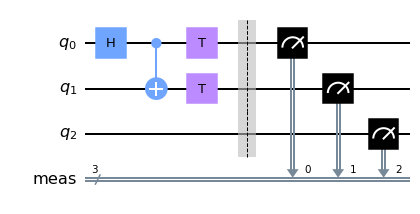

In [16]:
# How can I convert a quantum circuit to and from QASM?

from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.t([0,1])
qc.measure_all()
qc.draw()

In [19]:
print(qc.qasm(formatted=True, filename='my_circuit_qasm'))

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg meas[3];
h q[0];
cx q[0],q[1];
t q[0];
t q[1];
barrier q[0],q[1],q[2];
measure q[0] -> meas[0];
measure q[1] -> meas[1];
measure q[2] -> meas[2];

None


In [22]:
new_qc = QuantumCircuit.from_qasm_file('my_circuit_qasm')

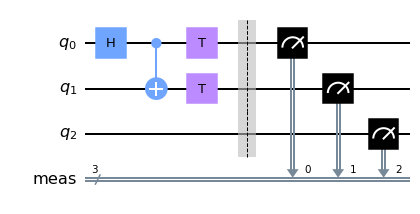

In [24]:
new_qc.draw()

In [57]:
# How can I monitor a job sent to IBM Quantum?

from qiskit import QuantumCircuit, IBMQ, execute
from qiskit.visualization import plot_histogram
provider = IBMQ.load_account()
lima = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2022-12-25 17:19:57,112: Credentials are already in use. The existing account in the session will be replaced.


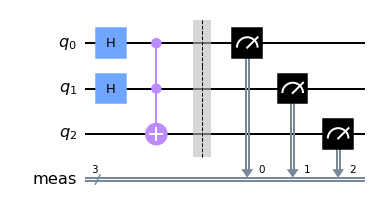

In [58]:
qc = QuantumCircuit(3)
qc.h([0,1])
qc.ccx(0,1,2)
qc.measure_all()
qc.draw()

In [59]:
import qiskit.tools.jupyter
%qiskit_job_watcher

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [60]:
job = execute(qc, lima)

In [61]:
job.status

<bound method IBMQJob.status of <qiskit.providers.ibmq.job.ibmqjob.IBMQJob object at 0x7f5c60549040>>

In [62]:
job.wait_for_final_state()

In [63]:
from qiskit.tools import job_monitor
job_monitor(job)

Job Status: job has successfully run


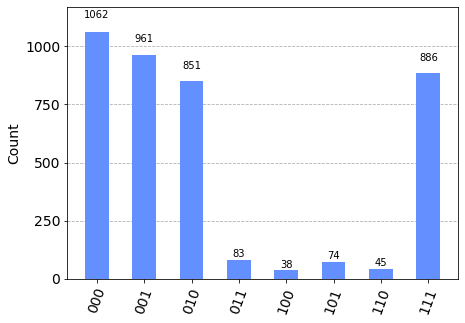

In [66]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

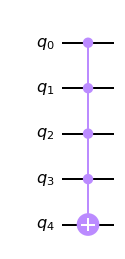

In [64]:
# How can I implement a multi control Toffoli gate?

from qiskit import QuantumCircuit

qc = QuantumCircuit(5)
qc.mct([0,1,2,3],4)
qc.draw()

In [67]:
# How can I use a specific version of Qiskit?
# As I do not use jupyter notebook ofline I am only going to remember things for online

import qiskit
qiskit.__version__

'0.22.2'

In [71]:
qiskit.__qiskit_version__

{'qiskit-terra': '0.22.2', 'qiskit-aer': '0.11.1', 'qiskit-ignis': None, 'qiskit-ibmq-provider': '0.19.2', 'qiskit': '0.39.2', 'qiskit-nature': '0.5.0', 'qiskit-finance': '0.3.4', 'qiskit-optimization': '0.4.0', 'qiskit-machine-learning': '0.5.0'}

In [79]:
# What's the Difference Between a Gate and an Instruction? 

# Gate = must be unitary 
# Instruction = Don't will not be necessarily unitary and it can't converted into gate

from qiskit import QuantumCircuit

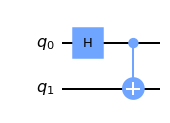

In [80]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw()

In [81]:
gate = qc.to_gate()

In [82]:
gate.control()

Instruction(name='ccircuit-306', num_qubits=3, num_clbits=0, params=[])

In [83]:
gate.power(5)

Instruction(name='unitary', num_qubits=2, num_clbits=0, params=[array([[ 2.22044605e-16-4.44089210e-16j, -1.90125693e-15+0.00000000e+00j,
         7.07106781e-01+3.33066907e-16j,  7.07106781e-01+1.59594560e-16j],
       [ 7.07106781e-01-1.38777878e-16j, -7.07106781e-01-6.45317133e-16j,
        -2.60902411e-15+3.88578059e-16j,  2.75821033e-15-1.11022302e-16j],
       [ 7.07106781e-01+3.05311332e-16j,  7.07106781e-01+3.19189120e-16j,
        -2.77555756e-16-4.44089210e-16j, -2.33840725e-15+1.38777878e-16j],
       [-2.55351296e-15+2.91433544e-16j,  2.60902411e-15+0.00000000e+00j,
         7.07106781e-01+5.55111512e-17j, -7.07106781e-01-7.32053307e-16j]])])

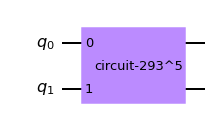

In [76]:
new_qc = QuantumCircuit(2)
new_qc.append(gate.power(5), [0,1])
new_qc.draw()

In [84]:
instruction = qc.to_instruction()

In [85]:
instruction.reverse_ops()

Instruction(name='circuit-306_reverse', num_qubits=2, num_clbits=0, params=[])

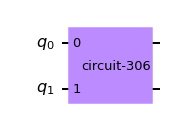

In [88]:
new_qc = QuantumCircuit(2)
new_qc.append(instruction, [0,1])
new_qc.draw()

/tmp/ipykernel_1327/2201994199.py:6: DeprecationWarning: Back-references to from Bit instances to their containing Registers have been deprecated. Instead, inspect Registers to find their contained Bits.
  qc.h(0).c_if(qc.clbits[0].register,1)


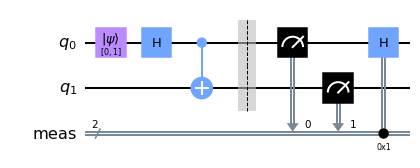

In [89]:
qc = QuantumCircuit(2)
qc.initialize([0,1],0)
qc.h(0)
qc.cx(0,1)
qc.measure_all()
qc.h(0).c_if(qc.clbits[0].register,1)
qc.draw()

In [92]:
instruction = qc.to_instruction()

In [96]:
gate = qc.to_gate()

Traceback (most recent call last):
  Input In [96] in <cell line: 1>
    gate = qc.to_gate()
  File /opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:1580 in to_gate
    return circuit_to_gate(self, parameter_map, label=label)
  File /opt/conda/lib/python3.8/site-packages/qiskit/converters/circuit_to_gate.py:50 in circuit_to_gate
    raise QiskitError("Circuit with classical bits cannot be converted to gate.")
QiskitError: 'Circuit with classical bits cannot be converted to gate.'

Use %tb to get the full traceback.


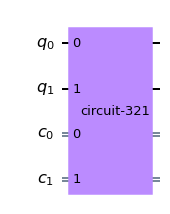

In [100]:
# to solve this error 
new_qc = QuantumCircuit(2,2)
new_qc.append(instruction, [0,1], [0,1])
new_qc.draw() # check by using decompose

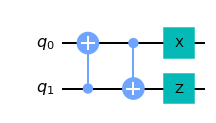

In [102]:
# How can I control the unitary part of a circuit?

qc = QuantumCircuit(2)
qc.cx(1,0)
qc.cx(0,1)
qc.x(0)
qc.z(1)
qc.draw()

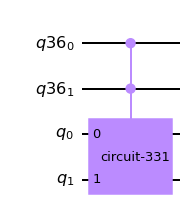

In [107]:
controlled_qc = qc.control(2)
controlled_qc.draw()

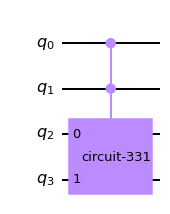

In [111]:
new_qc = QuantumCircuit(4)
new_qc = new_qc.compose(controlled_qc, range(4))
new_qc.draw() # Use decompose

In [112]:
# How can I combine two quantum circuits? 

from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library import QFT

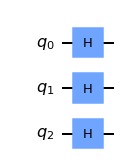

In [113]:
qc = QuantumCircuit(3)
qc.h(range(3))
qc.draw()

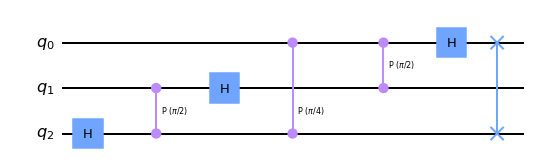

In [115]:
qft = QFT(3)
qft.decompose().draw()

/tmp/ipykernel_1327/2588379677.py:1: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  new_qc = qc + qft # it will only work for the same no of qubit


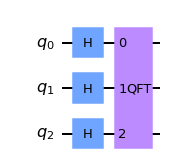

In [119]:
new_qc = qc + qft # it will only work for the same no of qubit
new_qc.draw()

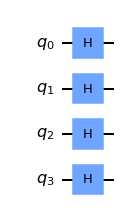

In [120]:
qc = QuantumCircuit(4)
qc.h(range(4))
qc.draw()

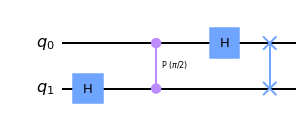

In [121]:
qft = QFT(2)
qft.decompose().draw()

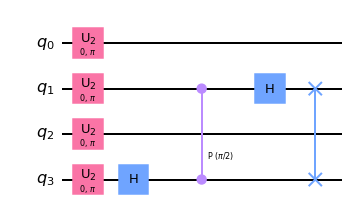

In [124]:
new_qc  = qc.compose(qft,[1,3])
new_qc.decompose().draw()

In [125]:
# or we can be giving names to our Q register
qft.qubits

[Qubit(QuantumRegister(2, 'q'), 0), Qubit(QuantumRegister(2, 'q'), 1)]

In [135]:
# Why does Qiskit order its qubits the way it does?

from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
qasm_simulator = Aer.get_backend('qasm_simulator')

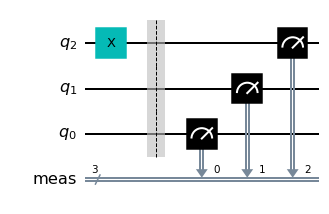

In [141]:
qc = QuantumCircuit(3)
qc.x(2)
qc.measure_all()
qc.draw(reverse_bits=True) # it won't make any changes to the original one(i mean result)

In [142]:
counts = execute(qc, qasm_sim).result().get_counts()
print(counts)

{'100': 1024}


$|q_{2}q_{1}q_{0} \rangle$

In [143]:
int('100',2)

4

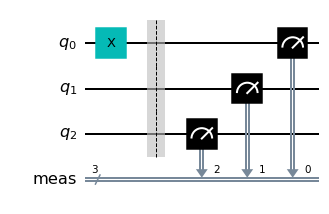

In [145]:
qc = QuantumCircuit(3)
qc.x(2)
qc.measure_all()
qc = qc.reverse_bits()
qc.draw() 

In [146]:
counts = execute(qc, qasm_sim).result().get_counts()
print(counts)

{'001': 1024}


In [6]:
# How do I use parameterized circuits in Qiskit?

from qiskit.circuit import Parameter
from qiskit import QuantumCircuit, transpile
from qiskit.circuit.library import QFT
from math import pi


/tmp/ipykernel_1478/3193412310.py:6: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qpe.cu1(0.3333,0,2)
/tmp/ipykernel_1478/3193412310.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qpe.cu1(0.6666,1,2)


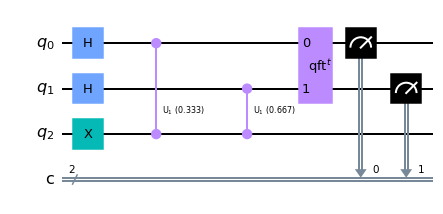

In [15]:
qpe = QuantumCircuit(3,2)
qft_dagger = QFT(2, inverse=True).to_gate()
qft_dagger.label = 'qft$^{t}$'
qpe.h([0,1])
qpe.x(2)
qpe.cu1(0.3333,0,2)
qpe.cu1(0.6666,1,2)
qpe.append(qft_dagger, [0,1])
qpe.measure([0,1],[0,1])
qpe.draw()

In [18]:
# but if we want a parameter
a = Parameter("a")

In [25]:
qpe = QuantumCircuit(3,2)
qft_dagger = QFT(2, inverse=True).to_gate()
qft_dagger.label = 'qft$^{t}$'
qpe.h([0,1])
qpe.x(2)
qpe.cu1(a,0,2)
qpe.cu1(a,1,2)
qpe.append(qft_dagger, [0,1])
qpe.measure([0,1],[0,1])
qpe.draw('text')

/tmp/ipykernel_1478/3232269753.py:6: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qpe.cu1(a,0,2)
/tmp/ipykernel_1478/3232269753.py:7: DeprecationWarning: The QuantumCircuit.cu1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.cp method instead, which acts identically.
  qpe.cu1(a,1,2)


┌───┐                ┌────────────┐┌─┐   
q_0: ┤ H ├─■──────────────┤0           ├┤M├───
     ├───┤ │              │  qft$^{t}$ │└╥┘┌─┐
q_1: ┤ H ├─┼───────■──────┤1           ├─╫─┤M├
     ├───┤ │U1(a)  │U1(a) └────────────┘ ║ └╥┘
q_2: ┤ X ├─■───────■─────────────────────╫──╫─
     └───┘                               ║  ║ 
c_0: ════════════════════════════════════╩══╬═
                                            ║ 
c_1: ═══════════════════════════════════════╩═

In [20]:
from qiskit.circuit import QuantumCircuit, Parameter

In [23]:
qc = QuantumCircuit(2)
params = [Parameter('A'), Parameter('B'),Parameter('C')]
qc.ry(params[0],0)
qc.crx(params[1],0,1)

print('Original circuit:')
qc.draw('text')

Original circuit:


┌───────┐         
q_0: ┤ Ry(A) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ Rx(B) ├
              └───────┘

In [24]:
qc.assign_parameters({params[0]: params[2]}, inplace=True)

print('Assigned in-place:')
qc.draw('text')

Assigned in-place:


┌───────┐         
q_0: ┤ Ry(C) ├────■────
     └───────┘┌───┴───┐
q_1: ─────────┤ Rx(B) ├
              └───────┘

In [26]:
# How Can I Convert a Unitary Matrix to a set of One & Two Qubit Gates?

from qiskit import QuantumCircuit , transpile

In [27]:
U = [[1,0,0,0],
     [0,0,0,1],
     [0,1,0,0],
     [0,0,1,0]]

In [28]:
qc = QuantumCircuit(2)
qc.unitary(U, [0,1])
qc.draw('text')

┌──────────┐
q_0: ┤0         ├
     │  Unitary │
q_1: ┤1         ├
     └──────────┘

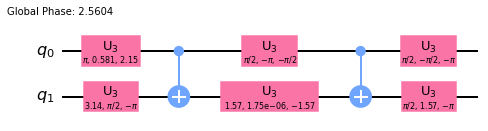

In [31]:
trans_qc = transpile(qc, basis_gates=['cx','u3'])
trans_qc.draw('mpl')

In [34]:
# Understanding unitary simulator 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(3,'q')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])
circ.draw('text')

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [38]:
from qiskit import Aer, execute
import numpy as np

backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

print('Simulation', result)
print(np.around(result.get_unitary(circ),3))

Simulation Result(backend_name='unitary_simulator', backend_version='0.11.1', qobj_id='e59f2ab4-46a9-481c-b5bb-32b86c671864', job_id='bd686b27-24b1-4b78-a5c5-82eea82561f9', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(unitary=Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0

In [39]:
# What is the qsphere?

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

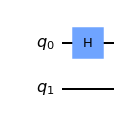

In [40]:
qc = QuantumCircuit(2)
qc.h(0)
qc.draw()

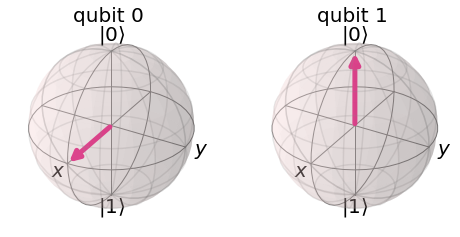

In [41]:
sv = Statevector.from_label('00')
sv = sv.evolve(qc)
plot_bloch_multivector(sv.data)

In [42]:
# but it is not efficient for the entangled circuit and also for multiqubit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('text')

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

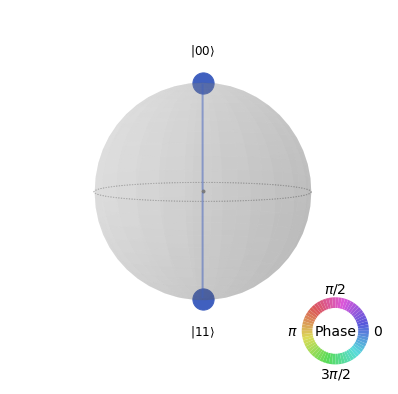

In [43]:
sv = Statevector.from_label('00')
sv = sv.evolve(qc)
plot_state_qsphere(sv.data)

In [44]:
# How can I use Mock Backends in Qiskit? 
from qiskit import QuantumCircuit,execute
from qiskit.visualization import plot_histogram


In [45]:
from qiskit.test.mock import FakeVigo
fake_vigo = FakeVigo()

/tmp/ipykernel_1478/2434077844.py:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeVigo


In [47]:
qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.measure_all()
qc.draw('text')

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas_0: ═══════════════════╩══╬══╬═
                              ║  ║ 
meas_1: ══════════════════════╩══╬═
                                 ║ 
meas_2: ═════════════════════════╩═

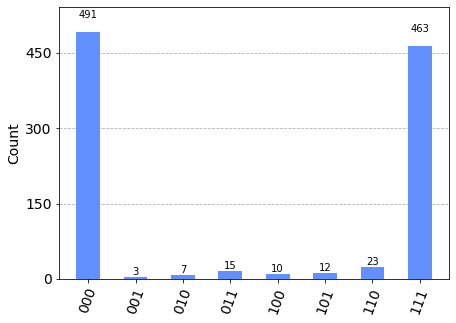

In [52]:
counts = execute(qc, fake_vigo).result().get_counts()
plot_histogram(counts)

In [53]:
from qiskit.tools.jupyter import *
fake_vigo

<FakeVigo('fake_vigo')>

In [54]:
import qiskit
from inspect import getmembers, isclass
for member in getmembers(qiskit.test.mock.backends, isclass):
    print(member[0])

FakeAlmaden
FakeAlmadenV2
FakeArmonk
FakeArmonkV2
FakeAthens
FakeAthensV2
FakeAuckland
FakeBelem
FakeBelemV2
FakeBoeblingen
FakeBoeblingenV2
FakeBogota
FakeBogotaV2
FakeBrooklyn
FakeBrooklynV2
FakeBurlington
FakeBurlingtonV2
FakeCairo
FakeCairoV2
FakeCambridge
FakeCambridgeAlternativeBasis
FakeCambridgeV2
FakeCasablanca
FakeCasablancaV2
FakeEssex
FakeEssexV2
FakeGeneva
FakeGuadalupe
FakeGuadalupeV2
FakeHanoi
FakeHanoiV2
FakeJakarta
FakeJakartaV2
FakeJohannesburg
FakeJohannesburgV2
FakeKolkata
FakeKolkataV2
FakeLagos
FakeLagosV2
FakeLima
FakeLimaV2
FakeLondon
FakeLondonV2
FakeManhattan
FakeManhattanV2
FakeManila
FakeManilaV2
FakeMelbourne
FakeMelbourneV2
FakeMontreal
FakeMontrealV2
FakeMumbai
FakeMumbaiV2
FakeNairobi
FakeNairobiV2
FakeOslo
FakeOurense
FakeOurenseV2
FakeParis
FakeParisV2
FakePerth
FakePoughkeepsie
FakePoughkeepsieV2
FakeQuito
FakeQuitoV2
FakeRochester
FakeRochesterV2
FakeRome
FakeRomeV2
FakeRueschlikon
FakeSantiago
FakeSantiagoV2
FakeSingapore
FakeSingaporeV2
FakeSydney


/tmp/ipykernel_1478/2633466958.py:3: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  for member in getmembers(qiskit.test.mock.backends, isclass):


In [56]:
# What is Qiskit's Barrier Operation?

from qiskit import QuantumCircuit , transpile, IBMQ
provider = IBMQ.load_account()
lima = provider.get_backend('ibmq_lima')

ibmqfactory.load_account:WARNING:2022-12-26 09:24:07,910: Credentials are already in use. The existing account in the session will be replaced.


In [61]:
qc = QuantumCircuit(1)
qc.h(0)
qc.h(0)
qc.barrier()
qc.x(0)
qc.h(0)
qc.draw('text')

┌───┐┌───┐ ░ ┌───┐┌───┐
q: ┤ H ├┤ H ├─░─┤ X ├┤ H ├
   └───┘└───┘ ░ └───┘└───┘

In [62]:
tqc = transpile(qc, lima)
tqc.draw('text')
# the difference is that barrier will remain and optimization will just be going to happen between two barrier

global phase: 7π/4
                ░ ┌─────────┐┌────┐┌──────────┐
      q_0 -> 0 ─░─┤ Rz(π/2) ├┤ √X ├┤ Rz(-π/2) ├
                ░ └─────────┘└────┘└──────────┘
ancilla_0 -> 1 ────────────────────────────────
                                               
ancilla_1 -> 2 ────────────────────────────────
                                               
ancilla_2 -> 3 ────────────────────────────────
                                               
ancilla_3 -> 4 ────────────────────────────────

In [63]:
# How can I View Device Properties and Configuration in Qiskit?
from qiskit import IBMQ
from qiskit.tools.jupyter import *
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-26 09:30:30,568: Credentials are already in use. The existing account in the session will be replaced.


In [65]:
lima  = provider.get_backend('ibmq_lima')

In [66]:
lima

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [69]:
lima.configuration().coupling_map

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]

In [71]:
lima.properties().t1(3)

9.648403590978179e-05

In [72]:
# How can I Simulate Statevectors in Qiskit? 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(3,'q')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])
circ.draw('text')

┌───┐          
q_0: ┤ H ├──■────■──
     └───┘┌─┴─┐  │  
q_1: ─────┤ X ├──┼──
          └───┘┌─┴─┐
q_2: ──────────┤ X ├
               └───┘

In [74]:
from qiskit import Aer
sim = Aer.get_backend('statevector_simulator')
result = sim.run(circ).result().get_statevector()
print(result)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))


In [75]:
# How can I Retrieve an old Job from IBM Quantum?
from qiskit import IBMQ


In [76]:
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
lima = provider.get_backend('ibmq_lima')
print(lima)

ibmqfactory.load_account:WARNING:2022-12-26 09:47:36,559: Credentials are already in use. The existing account in the session will be replaced.


ibmq_lima


In [80]:
job = lima.jobs(limit=2)
job

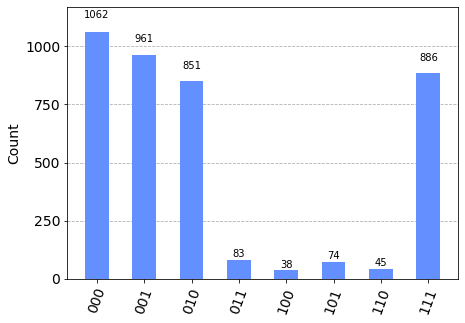

In [84]:
job = lima.retrieve_job('63a88641e047a28b97aa1a4a')
counts = job.result().get_counts()
plot_histogram(counts)

In [89]:
# What is the qasm Simulator? 

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

q = QuantumRegister(3,'q')
c = ClassicalRegister(2, 'c')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])
circ.measure_all()

circ.draw('text')

┌───┐           ░ ┌─┐      
   q_0: ┤ H ├──■────■───░─┤M├──────
        └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
   q_1: ─────┤ X ├──┼───░──╫─┤M├───
             └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ──────────┤ X ├─░──╫──╫─┤M├
                  └───┘ ░  ║  ║ └╥┘
meas_0: ═══════════════════╩══╬══╬═
                              ║  ║ 
meas_1: ══════════════════════╩══╬═
                                 ║ 
meas_2: ═════════════════════════╩═

In [90]:
from qiskit import Aer
sim = Aer.get_backend('qasm_simulator')
result = sim.run(circ).result().get_counts()
print(result)

{'111': 517, '000': 507}


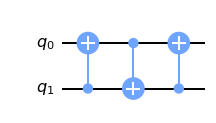

In [91]:
# How can I Control the Unitary Part of a Circuit?

from qiskit import QuantumCircuit

my_circuit = QuantumCircuit(2)
my_circuit.cx(1,0)
my_circuit.cx(0,1)
my_circuit.cx(1,0)
my_circuit.draw()

In [92]:
my_gate = my_circuit.to_gate()

In [93]:
my_gate.name = 'My Gate'

In [98]:
my_controlled_gate = my_gate.control(2)

In [101]:
new_circuit = QuantumCircuit(4)
new_circuit.append(my_controlled_gate, [0,1,2,3])
new_circuit.draw('text')

q_0: ─────■──────
          │      
q_1: ─────■──────
     ┌────┴─────┐
q_2: ┤0         ├
     │  My Gate │
q_3: ┤1         ├
     └──────────┘

In [103]:
# How can I Invert the Unitary Part of a Circuit?

from qiskit import QuantumCircuit

my_circuit = QuantumCircuit(2)
my_circuit.cx(1,0)
my_circuit.cx(0,1)
my_circuit.cx(1,0)
my_circuit.draw('text')

┌───┐     ┌───┐
q_0: ┤ X ├──■──┤ X ├
     └─┬─┘┌─┴─┐└─┬─┘
q_1: ──■──┤ X ├──■──
          └───┘

In [104]:
my_gate = my_circuit.to_gate()
my_inverse_gate = my_gate.inverse()

In [105]:
my_inverse_gate.name = 'Inverse Gate'

In [107]:
my_controlled_gate = my_inverse_gate.control(2)

In [106]:
new_circuit = QuantumCircuit(4)
new_circuit.append(my_inverse_gate, [0,1,2,3])
new_circuit.draw('text')

q_0: ─────■──────
          │      
q_1: ─────■──────
     ┌────┴─────┐
q_2: ┤0         ├
     │  My Gate │
q_3: ┤1         ├
     └──────────┘

In [1]:
# test 
from qiskit import *

q  = QuantumRegister(3)
c  = ClassicalRegister(3)
qc = QuantumCircuit(q,c)

qc.draw('text')

q0_0: 
      
q0_1: 
      
q0_2: 
      
c0_0: 
      
c0_1: 
      
c0_2: